Customers Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transactions Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
Davies-Bouldin Index: 1.060424039992303


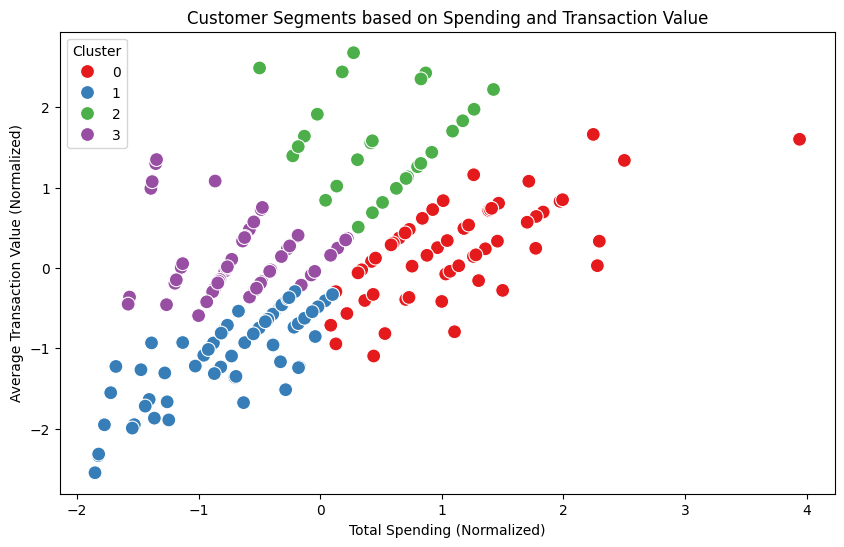

Clustered data saved to 'D:/zeotap/customer_segments.csv'.


In [2]:
# Import Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Datasets
customers = pd.read_csv("D:/zeotap/Customers - Customers.csv")
transactions = pd.read_csv("D:/zeotap/Transactions - Transactions.csv")

# check the Columns to Check for the 'CustomerID' Column
print("Customers Columns:", customers.columns)
print("Transactions Columns:", transactions.columns)

# Clean Column Names 
customers.columns = customers.columns.str.strip()
transactions.columns = transactions.columns.str.strip()

# Ensure both DataFrames have the same 'CustomerID' column name
data = transactions.merge(customers, on="CustomerID", how="left")

# Create a summary for each customer
customer_summary = data.groupby("CustomerID").agg(
    TotalSpending=("TotalValue", "sum"),             
    AvgTransactionValue=("TotalValue", "mean"),     
    TotalTransactions=("TransactionID", "count")   
).reset_index()

# Normalize the Numerical Data (Scaling)
scaler = StandardScaler()
numerical_columns = ["TotalSpending", "AvgTransactionValue", "TotalTransactions"]
customer_summary[numerical_columns] = scaler.fit_transform(customer_summary[numerical_columns])

# Clustering with KMeans 
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(customer_summary[numerical_columns])

# Clustering Metrics - DB Index
db_index = davies_bouldin_score(customer_summary[numerical_columns], customer_summary['Cluster'])
print("Davies-Bouldin Index:", db_index)

# Visualizing the Clusters
plt.figure(figsize=(10, 6))

# Scatter plot of clusters based on TotalSpending and AvgTransactionValue
sns.scatterplot(x='TotalSpending', y='AvgTransactionValue', hue='Cluster', data=customer_summary, palette='Set1', s=100)

plt.title("Customer Segments based on Spending and Transaction Value")
plt.xlabel("Total Spending (Normalized)")
plt.ylabel("Average Transaction Value (Normalized)")
plt.legend(title="Cluster")
plt.show()

# Saving the Clustered Data to CSV
output_path = "D:/zeotap/customer_segments.csv"
customer_summary.to_csv(output_path, index=False)
print(f"Clustered data saved to '{output_path}'.")